# Differential accessibility for E vs V snATAC-seq
- https://stuartlab.org/signac/articles/mouse_brain_vignette

## Set up correct conda environment


In [20]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

## Load packages

In [21]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

In [22]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1                     ggpointdensity_0.1.0              
 [3] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.68.0                   
 [5] rtracklayer_1.60.1                 Bi

## STEP 0: Paths

In [23]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC"

In [24]:
# E+V merged object (no cell type labels)
E_V.atac.obj.path <- paste0(data_master_dir, '/xjluo_analysis', '/step2_merge', '/E_V', '/E2_V_merged.annotated.rds')

E_V.atac.obj.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step2_merge/E_V/E2_V_merged.annotated.rds"

In [25]:
rna_path <- paste0(data_master_dir, '/', 'RNA', '/', 'ctx.Robj')

rna_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/RNA/ctx.Robj"

In [26]:
# save output (labeled) object in this folder
merge_savedir <- paste0(data_master_dir, '/xjluo_analysis/step2_merge')

merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step2_merge"

## STEP 1: Load objects

In [27]:
E_V.merged.atac.obj <- readRDS(E_V.atac.obj.path)

In [28]:
load(rna_path)

# NOTE: the 'v4' in variable names is just for convenience, since this notebook is adapted from a previous ATAC dataset.
# Seurat v5 is now used.

rna.obj <- ctx


In [29]:
E_V.merged.atac.obj

An object of class Seurat 
340622 features across 4919 samples within 2 assays 
Active assay: ACTIVITY (1528 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

In [30]:
colnames(E_V.merged.atac.obj@meta.data)

[1] "orig.ident"                         "nCount_ATAC"                       
 [3] "nFeature_ATAC"                      "nucleosome_signal"                 
 [5] "nucleosome_percentile"              "TSS.enrichment"                    
 [7] "TSS.percentile"                     "ATAC_snn_res.1.2"                  
 [9] "seurat_clusters"                    "dataset"                           
[11] "nCount_ACTIVITY"                    "nFeature_ACTIVITY"                 
[13] "predicted.id"                       "prediction.score.IN.Lamp5.Lhx6"    
[15] "prediction.score.L2.3.5.IT"         "prediction.score.Astro_Aqp4"       
[17] "prediction.score.Astro_Top2a"       "prediction.score.L6.IT_2"          
[19] "prediction.score.Migrating.neurons" "prediction.score.L6.CT_Cpa6"       
[21] "prediction.score.OPC_Pdgfra"        "prediction.score.L6.IT_1"          
[23] "prediction.score.max"

In [31]:
rna.obj

An object of class Seurat 
32475 features across 7158 samples within 6 assays 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 5 other assays present: ADT, prediction.score.class, prediction.score.cluster, prediction.score.subclass, prediction.score.cross_species_cluster
 5 dimensional reductions calculated: integrated_dr, ref.umap, pca, umap.unintegrated, umap

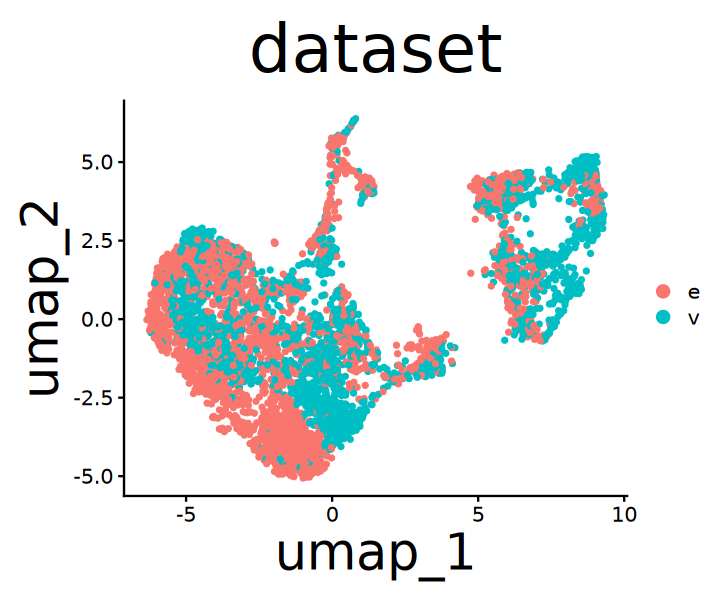

In [32]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(E_V.merged.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

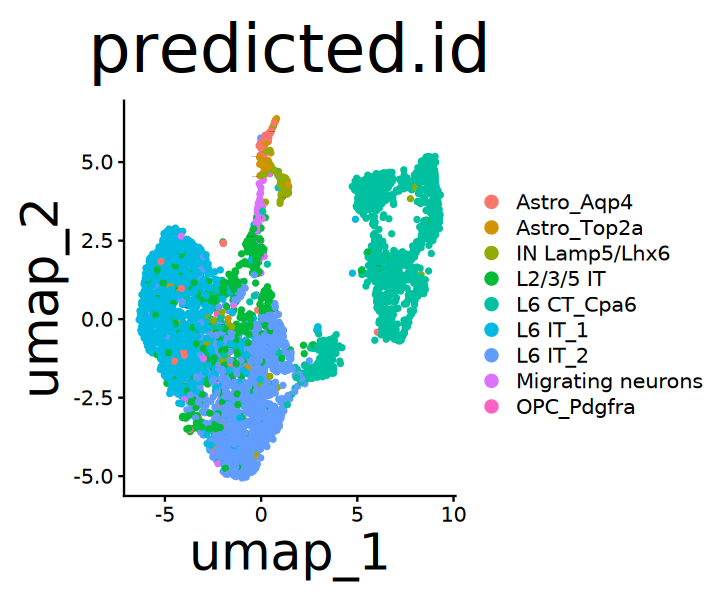

In [33]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(E_V.merged.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

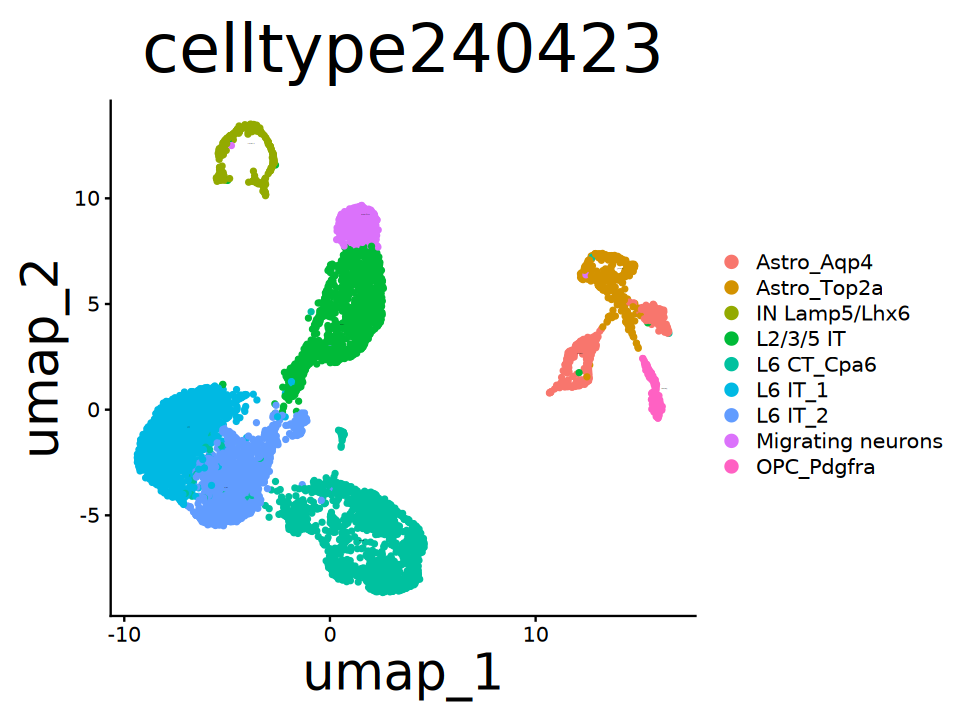

In [34]:
# RNA
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(rna.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.size=1, label.size=0, reduction = "umap", group.by = 'celltype240423', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     


## STEP 2: Differential accessibility (Wilcoxon)

In [35]:
Idents(E_V.merged.atac.obj) <- 'dataset'

unique(Idents(E_V.merged.atac.obj))

[1] e v
Levels: e v

In [36]:
table(Idents(E_V.merged.atac.obj))


   e    v 
2668 2251 

In [37]:
Assays(E_V.merged.atac.obj)

[1] "ATAC"     "ACTIVITY"

In [38]:
DefaultAssay(E_V.merged.atac.obj) <- 'ATAC'

da_peaks <- FindMarkers(
  object = E_V.merged.atac.obj,
  ident.1 = c("e"), 
  ident.2 = c("v"),
  test.use = 'wilcox',
)

# use Wilcoxon as first pass: https://github.com/stuart-lab/signac/issues/1321

In [60]:
head(da_peaks, n=50)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1-170385639-170388158,6.560042e-65,1.9688316,0.269,0.096,2.224471e-59
chr7-78753067-78756344,1.983581e-41,-1.1563483,0.097,0.250,6.726205e-36
chr11-40783310-40785521,5.573042e-40,-1.0765100,0.104,0.263,1.889785e-34
chr6-72080883-72082342,1.421501e-35,-1.3869791,0.058,0.175,4.820224e-30
chr9-27541483-27542615,2.728781e-35,-1.1660893,0.081,0.213,9.253134e-30
chr14-12376445-12379702,3.031938e-34,-0.9029065,0.133,0.287,1.028112e-28
chr10-14179152-14180657,1.845761e-33,-0.5761147,0.267,0.488,6.258863e-28
chr2-147750558-147754172,2.934753e-33,-0.6681379,0.211,0.409,9.951570e-28
chr11-113359309-113360847,9.902473e-33,-1.3161057,0.056,0.167,3.357869e-27


### STEP 2.1: check DA peaks

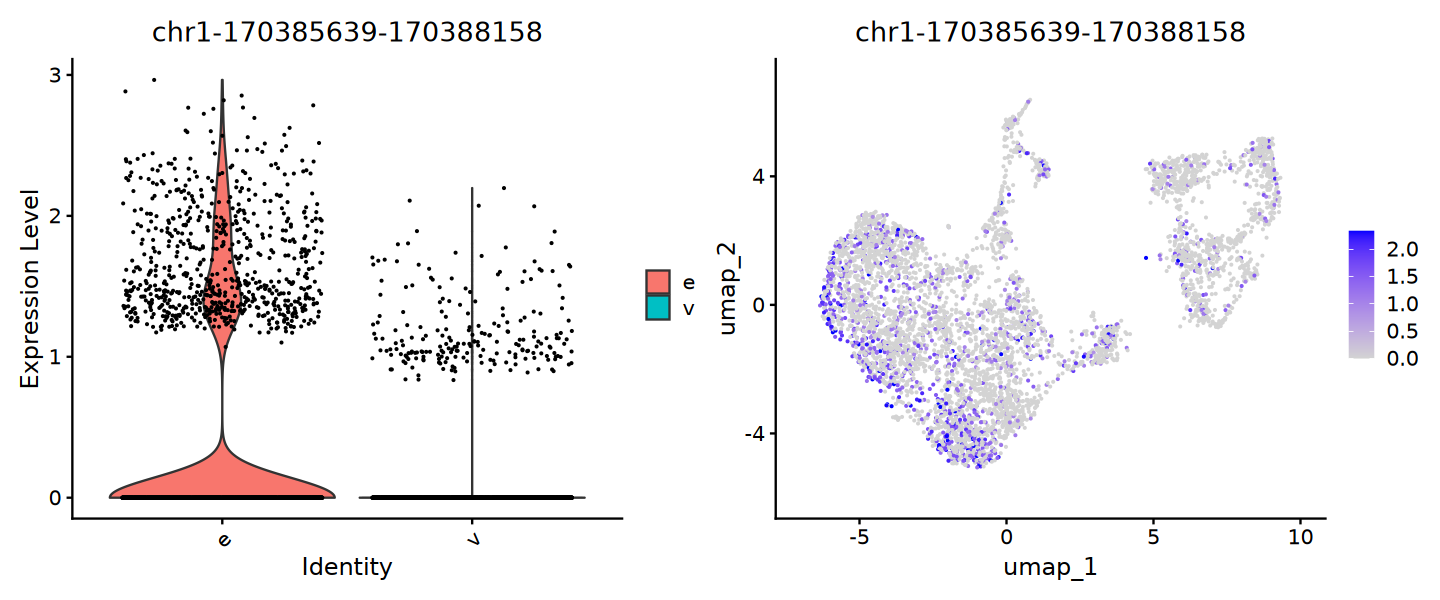

In [40]:
options(repr.plot.width=12, repr.plot.height=5)

plot1 <- VlnPlot(
  object = E_V.merged.atac.obj,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  idents = c("e","v")
)
plot2 <- FeaturePlot(
  object = E_V.merged.atac.obj,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  max.cutoff = 'q95'
)
plot1 | plot2

## STEP 3: DA with cell type information

In [41]:
E_V.merged.atac.obj$dataset_celltype <- paste0(E_V.merged.atac.obj$dataset, '_', E_V.merged.atac.obj$predicted.id)

In [42]:
head(E_V.merged.atac.obj$dataset_celltype)

E_AAACGAAAGCATTCCA-1 E_AAACGAACAACGACAG-1 E_AAACGAACACAGCTTA-1 
         "e_L6 IT_2"          "e_L6 IT_2"       "e_L6 CT_Cpa6" 
E_AAACGAAGTACCTATG-1 E_AAACGAATCCGTGCAG-1 E_AAACGAATCGGAGTTT-1 
         "e_L6 IT_2"          "e_L6 IT_2"        "e_L2/3/5 IT"

In [43]:
unique(E_V.merged.atac.obj$dataset_celltype)
length(unique(E_V.merged.atac.obj$dataset_celltype))

[1] "e_L6 IT_2"           "e_L6 CT_Cpa6"        "e_L2/3/5 IT"        
 [4] "e_L6 IT_1"           "e_IN Lamp5/Lhx6"     "e_Migrating neurons"
 [7] "e_Astro_Aqp4"        "e_OPC_Pdgfra"        "e_Astro_Top2a"      
[10] "v_L6 IT_1"           "v_L6 CT_Cpa6"        "v_L2/3/5 IT"        
[13] "v_Astro_Top2a"       "v_L6 IT_2"           "v_IN Lamp5/Lhx6"    
[16] "v_Astro_Aqp4"        "v_Migrating neurons" "v_OPC_Pdgfra"

[1] 18

In [44]:
table(E_V.merged.atac.obj$dataset_celltype)


       e_Astro_Aqp4       e_Astro_Top2a     e_IN Lamp5/Lhx6         e_L2/3/5 IT 
                 58                  36                  82                 315 
       e_L6 CT_Cpa6           e_L6 IT_1           e_L6 IT_2 e_Migrating neurons 
                508                 864                 744                  58 
       e_OPC_Pdgfra        v_Astro_Aqp4       v_Astro_Top2a     v_IN Lamp5/Lhx6 
                  3                  19                  21                  36 
        v_L2/3/5 IT        v_L6 CT_Cpa6           v_L6 IT_1           v_L6 IT_2 
                238                 777                 561                 589 
v_Migrating neurons        v_OPC_Pdgfra 
                  9                   1 

In [47]:
# Focus on Layer 6 excitatory neurons

Idents(E_V.merged.atac.obj) <- E_V.merged.atac.obj$dataset_celltype
DefaultAssay(E_V.merged.atac.obj) <- 'ATAC'

da_peaks.celltypes <- FindMarkers(
  object = E_V.merged.atac.obj,
  ident.1 = c("e_L6 IT_1", 
              "e_L6 IT_2"), 
  ident.2 = c("v_L6 IT_1", 
              "v_L6 IT_2"),
  test.use = 'wilcox',
)

# use Wilcoxon as first pass: https://github.com/stuart-lab/signac/issues/1321

In [48]:
head(da_peaks.celltypes, n=50)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1-170385639-170388158,9.302443e-57,2.4213469,0.324,0.088,3.154403e-51
chr7-72590114-72591413,1.972636e-21,-1.0732868,0.098,0.248,6.689090e-16
chr5-88949564-88950785,6.228518e-20,-0.8908553,0.128,0.290,2.112053e-14
chr6-32873727-32874996,6.502259e-20,-0.9124936,0.114,0.270,2.204877e-14
chr3-54269129-54269761,1.202311e-19,-1.1391698,0.073,0.201,4.076964e-14
chr1-79268923-79269783,1.449060e-19,2.2760054,0.128,0.032,4.913675e-14
chr2-38023069-38024802,4.628192e-19,-0.7497788,0.184,0.373,1.569392e-13
chr10-14209400-14212522,1.010106e-18,-0.6338671,0.220,0.424,3.425209e-13
chr1-30685085-30685714,1.537434e-18,2.2797950,0.122,0.030,5.213346e-13


### STEP 3.1: check cell type specific DA peaks

In [49]:
unique(Idents(E_V.merged.atac.obj))
length(unique(Idents(E_V.merged.atac.obj)))

[1] e_L6 IT_2           e_L6 CT_Cpa6        e_L2/3/5 IT        
 [4] e_L6 IT_1           e_IN Lamp5/Lhx6     e_Migrating neurons
 [7] e_Astro_Aqp4        e_OPC_Pdgfra        e_Astro_Top2a      
[10] v_L6 IT_1           v_L6 CT_Cpa6        v_L2/3/5 IT        
[13] v_Astro_Top2a       v_L6 IT_2           v_IN Lamp5/Lhx6    
[16] v_Astro_Aqp4        v_Migrating neurons v_OPC_Pdgfra       
18 Levels: e_L6 IT_2 e_L6 CT_Cpa6 e_L2/3/5 IT e_L6 IT_1 ... v_OPC_Pdgfra

[1] 18

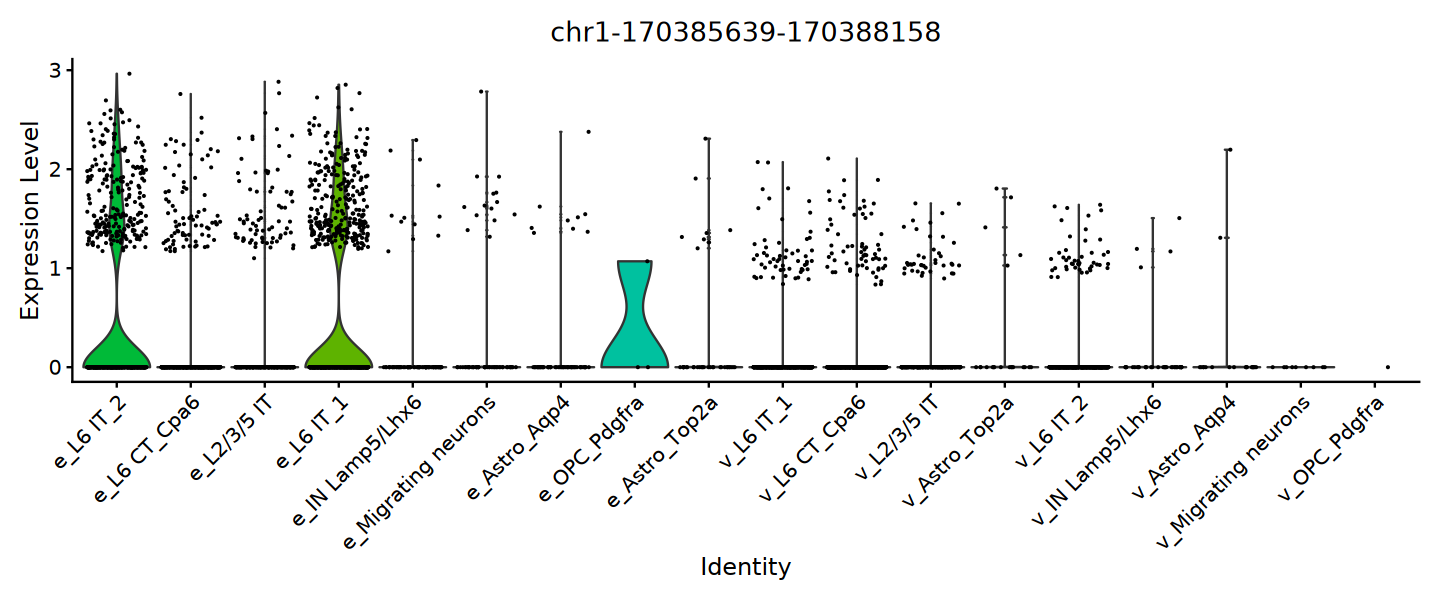

In [50]:
options(repr.plot.width=12, repr.plot.height=5)

Idents(E_V.merged.atac.obj) <- E_V.merged.atac.obj$dataset_celltype
plot1 <- VlnPlot(
  object = E_V.merged.atac.obj,
  features = rownames(da_peaks.celltypes)[1],
  pt.size = 0.1

)+theme(legend.position="none")


plot1

# https://stackoverflow.com/questions/35618260/remove-legend-ggplot-2-2

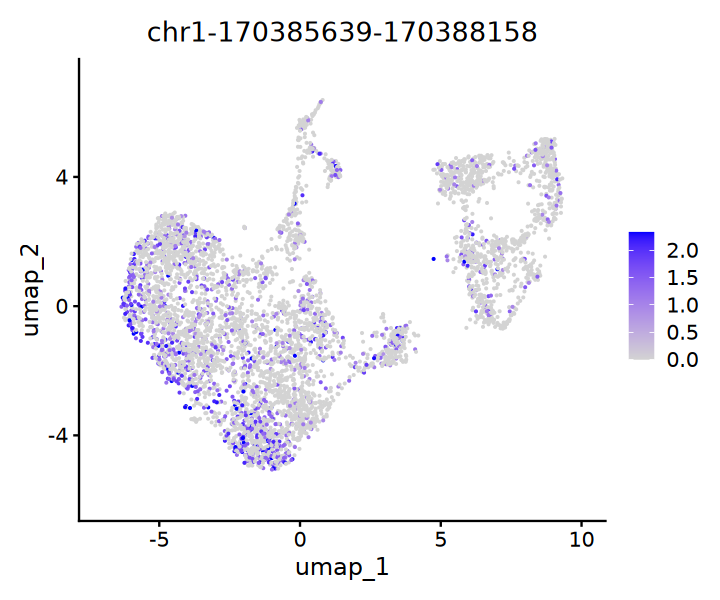

In [61]:
options(repr.plot.width=6, repr.plot.height=5)

plot2 <- FeaturePlot(
  object = E_V.merged.atac.obj,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  max.cutoff = 'q95')
    
plot2

In [62]:
da_peaks.celltypes.high <- rownames(da_peaks.celltypes[da_peaks$avg_log2FC > 1, ])
closest_genes.wilcox <- ClosestFeature(E_V.merged.atac.obj, da_peaks.celltypes.high)

In [63]:
head(closest_genes.wilcox,n=50)

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENSMUST00000161966,ENSMUST00000161966,Nos1ap,ENSMUSG00000038473,protein_coding,gap,chr1-170375307-170390730,chr1-170385639-170388158,0
ENSMUST00000140107,ENSMUST00000140107,Cep44,ENSMUSG00000038215,protein_coding,utr,chr8-56550688-56550843,chr8-56550385-56551947,0
ENSMUSE00000413572,ENSMUST00000052718,Kcna3,ENSMUSG00000047959,protein_coding,exon,chr3-107036162-107038129,chr3-106956883-106959127,77034
ENSMUST00000045593,ENSMUST00000045593,Daglb,ENSMUSG00000039206,protein_coding,cds,chr5-143464682-143464776,chr5-143463277-143465323,0
ENSMUST00000020112,ENSMUST00000020112,Uhrf1bp1l,ENSMUSG00000019951,protein_coding,cds,chr10-89745245-89745288,chr10-89744668-89746040,0
ENSMUSE00000633798,ENSMUST00000066005,A530021J07Rik,ENSMUSG00000053528,protein_coding,exon,chr7-83148644-83148700,chr7-83055388-83057569,91074
ENSMUST00000029666,ENSMUST00000029666,Papss1,ENSMUSG00000028032,protein_coding,utr,chr3-131643103-131643670,chr3-131685711-131686833,42040
ENSMUST00000130348,ENSMUST00000130348,Nhlrc3,ENSMUSG00000042997,protein_coding,utr,chr3-53448588-53452649,chr3-53378999-53380175,68412
ENSMUST00000106651,ENSMUST00000106651,Rab3b,ENSMUSG00000003411,protein_coding,utr,chr4-108879200-108879218,chr4-108878413-108880423,0


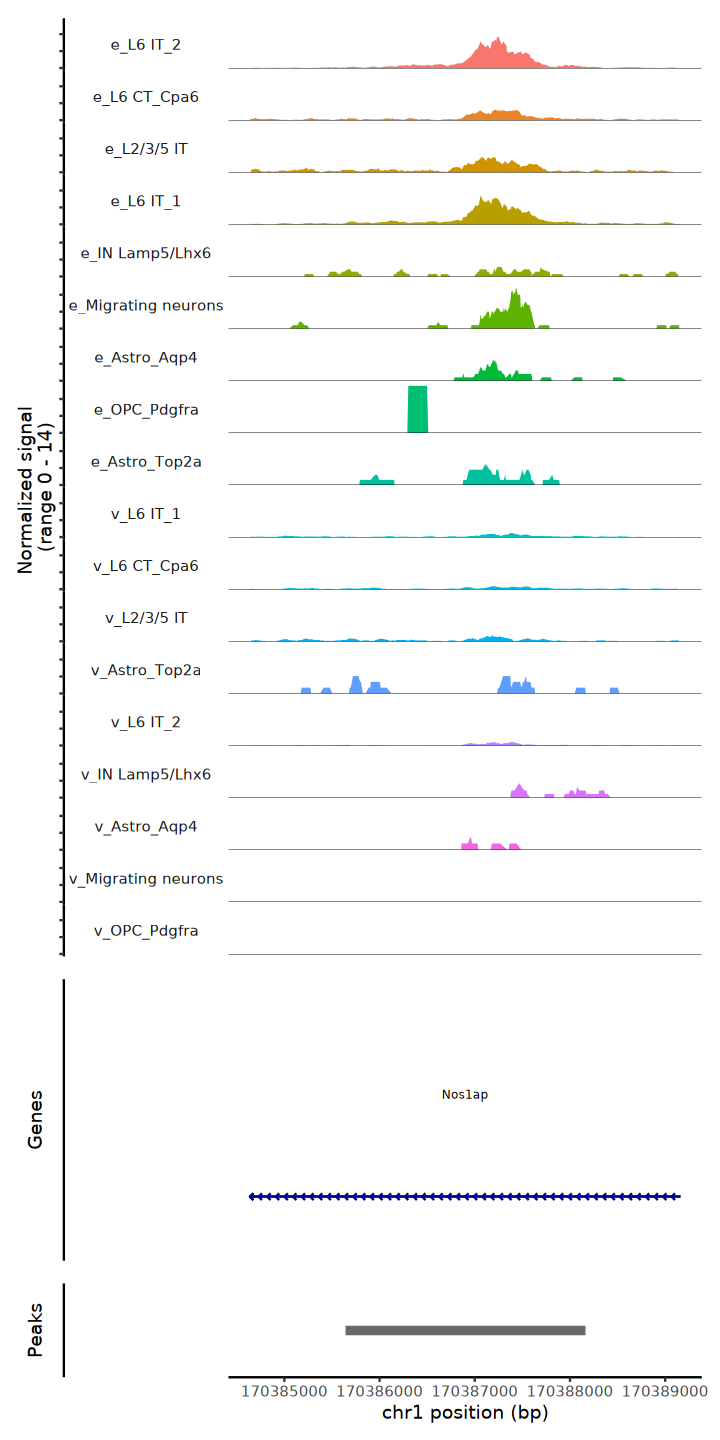

In [72]:
options(repr.plot.width=6, repr.plot.height=12)

levels(E_V.merged.atac.obj) <- unique(E_V.merged.atac.obj$dataset_celltype)

CoveragePlot(
  object = E_V.merged.atac.obj,
  region = rownames(da_peaks)[1],
  extend.upstream = 1000,
  extend.downstream = 1000,
  ncol = 1
)

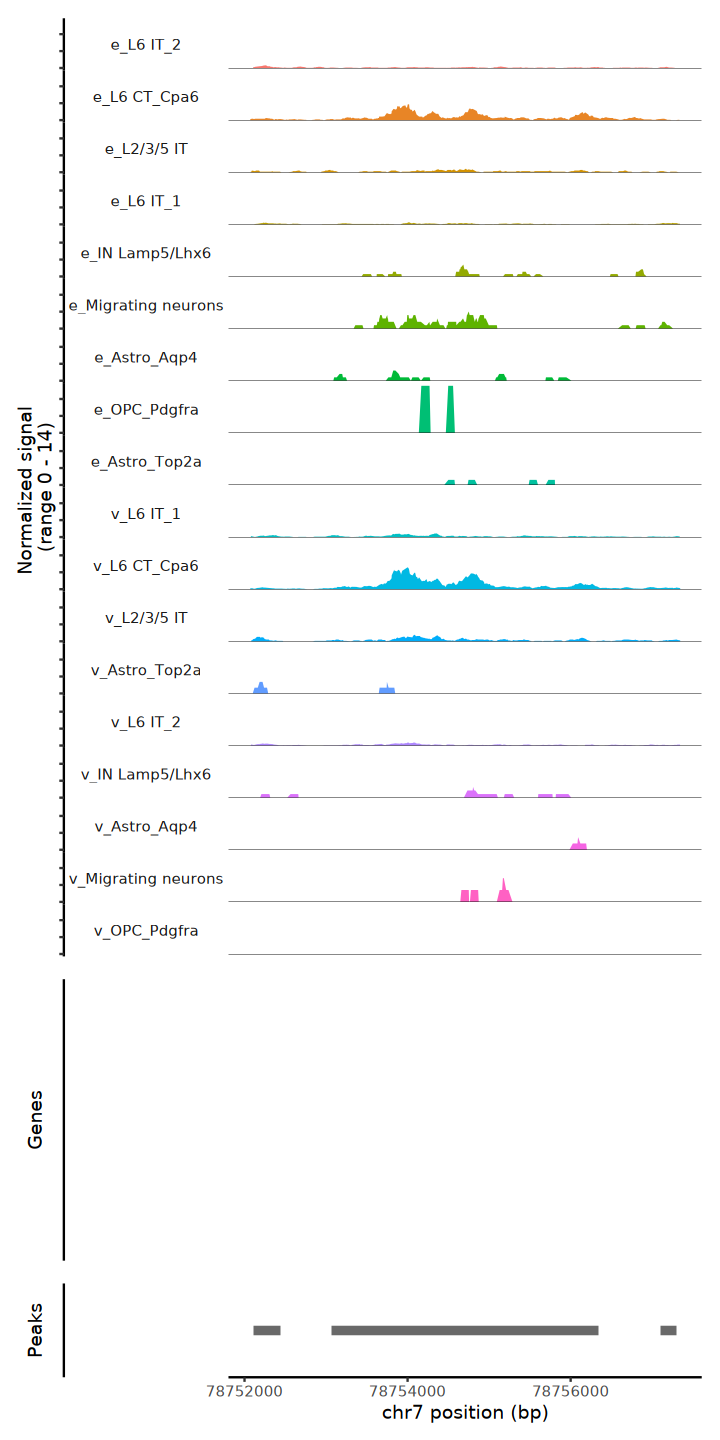

In [73]:
options(repr.plot.width=6, repr.plot.height=12)

levels(E_V.merged.atac.obj) <- unique(E_V.merged.atac.obj$dataset_celltype)

CoveragePlot(
  object = E_V.merged.atac.obj,
  region = rownames(da_peaks)[2],
  extend.upstream = 1000,
  extend.downstream = 1000,
  ncol = 1
)

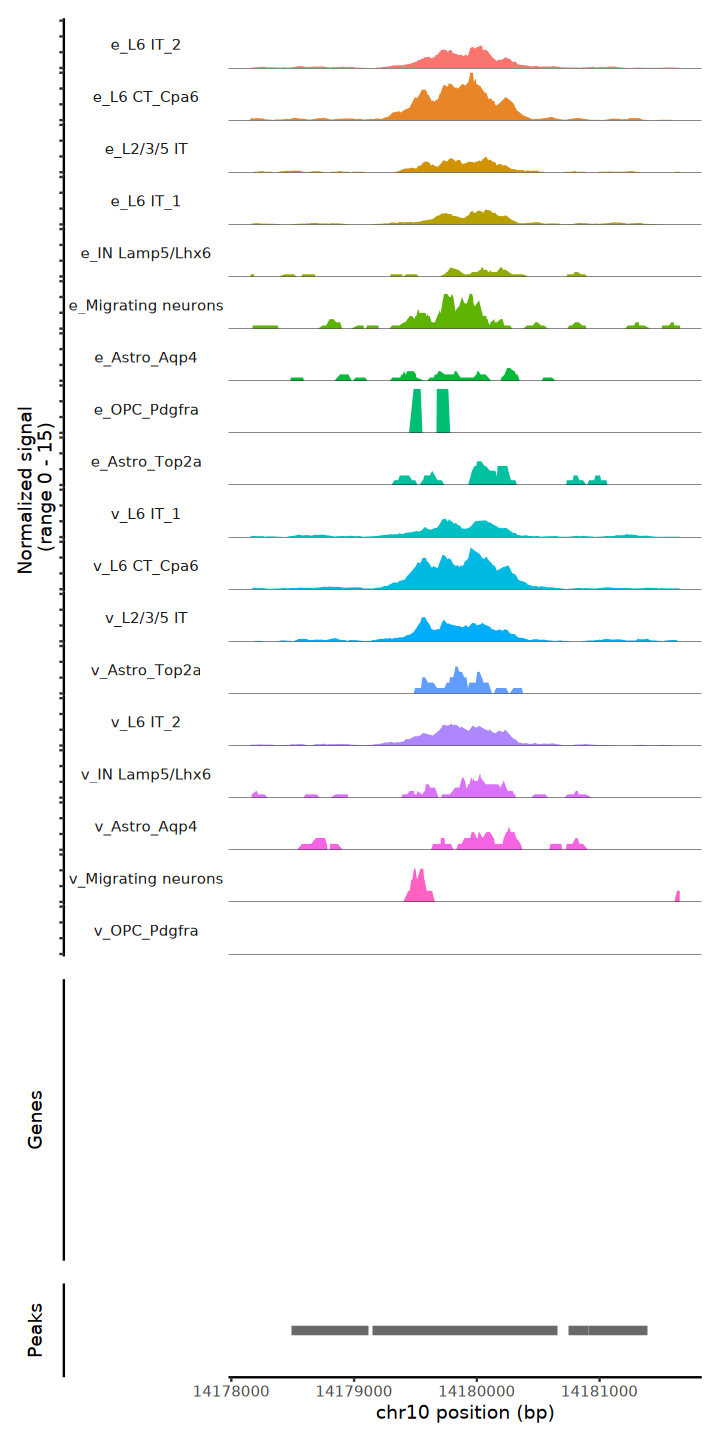

In [77]:
options(repr.plot.width=6, repr.plot.height=12)

levels(E_V.merged.atac.obj) <- unique(E_V.merged.atac.obj$dataset_celltype)

CoveragePlot(
  object = E_V.merged.atac.obj,
  region = rownames(da_peaks)[7],
  extend.upstream = 1000,
  extend.downstream = 1000,
  ncol = 1
)

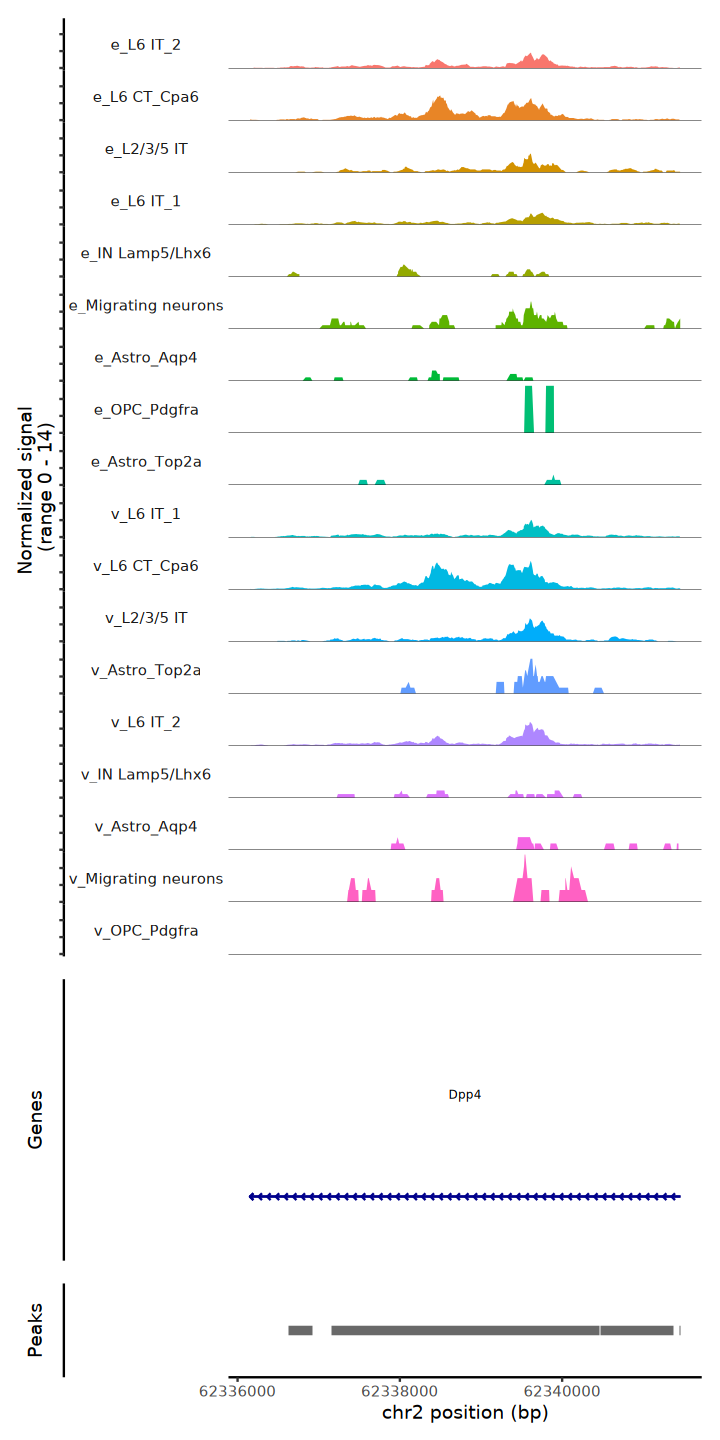

In [75]:
options(repr.plot.width=6, repr.plot.height=12)

levels(E_V.merged.atac.obj) <- unique(E_V.merged.atac.obj$dataset_celltype)

CoveragePlot(
  object = E_V.merged.atac.obj,
  region = rownames(da_peaks)[10],
  extend.upstream = 1000,
  extend.downstream = 1000,
  ncol = 1
)

## STEP 4: Check "LR" (logistic regression) method
- " “LR” : Uses a logistic regression framework to determine differentially expressed genes. Constructs a logistic regression model predicting group membership based on each feature individually and compares this to a null model with a likelihood ratio test." (https://satijalab.org/seurat/articles/de_vignette)

In [54]:
# Before differential accessibility, change nCount
DefaultAssay(E_V.merged.atac.obj) <- 'ATAC'
combined.peaks <- granges(E_V.merged.atac.obj)

combined.peaks

GRanges object with 282362 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1   3113574-3113910      *
       [2]     chr1   3117459-3117613      *
       [3]     chr1   3118759-3118909      *
       [4]     chr1   3119337-3120931      *
       [5]     chr1   3121282-3122023      *
       ...      ...               ...    ...
  [282358]     chrY 90808301-90809119      *
  [282359]     chrY 90809276-90809628      *
  [282360]     chrY 90809686-90809836      *
  [282361]     chrY 90809983-90810439      *
  [282362]     chrY 90810541-90813937      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths

In [55]:
counts_in_macs <- CountsInRegion(
  object = E_V.merged.atac.obj,
  assay = 'ATAC',
  regions = combined.peaks    # consensus peak set (E1, E2, V1) from above
)

E_V.merged.atac.obj <- AddMetaData(object = E_V.merged.atac.obj, metadata = counts_in_macs, col.name = 'counts_in_macs_peaks')


In [75]:
# DA with "LR"
DefaultAssay(E_V.merged.atac.obj) <- 'ATAC'
Idents(E_V.merged.atac.obj) <- E_V.merged.atac.obj$dataset_celltype

da.peaks.LR.celltypes <- FindMarkers(
            object = E_V.merged.atac.obj,
            min.pct = 0.05,
            test.use = 'LR',
            latent.vars = 'counts_in_macs_peaks',
            ident.1 = c("e_L6 IT 1", 
              "e_L6 IT 2", 
             "e_L6 L6b 2",
             "e_L6CT L6b 1"), 
            ident.2 = c("v_L6 IT 1", 
              "v_L6 IT 2", 
             "v_L6 L6b 2",
             "v_L6CT L6b 1"),
            assay = "ATAC",
            logfc.threshold = 0.01,
            pseudocount.use = 1e-04
    
)

In [ ]:
head(da.peaks.LR.celltypes, n=50)

# END